In [ ]:
# import the needed libraries
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# configuration
img_width, img_height = 195,22 #width & height of input image
input_depth = 1 #1: gray image
train_data_dir = '/content/drive/MyDrive/summer internship-cps/train' #data training path
testing_data_dir = '/content/drive/MyDrive/summer internship-cps/test' #data testing path
epochs = 10 #number of training epoch
batch_size = 16 #training batch size

# define image generator for Keras,
# here, we map pixel intensity to 0-1
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

# read image batch by batch
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    color_mode='grayscale',#inpput iameg: gray
    target_size=(img_width,img_height),#input image size
    batch_size=batch_size,#batch size
    class_mode='binary')#categorical: one-hot encoding format class label
testing_generator = test_datagen.flow_from_directory(
    testing_data_dir,
    #color_mode='grayscale',
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 504 images belonging to 2 classes.
Found 111 images belonging to 2 classes.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


TypeError: ignored

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
# define number of filters and nodes in the fully connected layer
NUMB_FILTER_L1 = 20
NUMB_FILTER_L2 = 20
NUMB_FILTER_L3 = 20
NUMB_NODE_FC_LAYER = 10

#define input image order shape
if K.image_data_format() == 'channels_first':
    input_shape_val = (input_depth, img_width, img_height)
else:
    input_shape_val = (img_width, img_height, input_depth)

#define the network
model = Sequential()

# Layer 1
model.add(Conv2D(NUMB_FILTER_L1, (5, 5),
                 input_shape=input_shape_val,
                 padding='same', name='input_tensor'))
model.add(Activation('relu'))
model.add(MaxPool2D((2, 2)))

# Layer 2
model.add(Conv2D(NUMB_FILTER_L2, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D((2, 2)))

# Layer 3
model.add(Conv2D(NUMB_FILTER_L3, (5, 5), padding='same'))
model.add(Activation('relu'))

# flattening the model for fully connected layer
model.add(Flatten())

# fully connected layer
model.add(Dense(NUMB_NODE_FC_LAYER, activation='relu'))

# output layer
model.add(Dense(1,
                activation='sigmoid', name='output_tensor'))

# Compilile the network
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

# Show the model summary
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_tensor (Conv2D)       (None, 195, 22, 20)       520       
                                                                 
 activation_48 (Activation)  (None, 195, 22, 20)       0         
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 97, 11, 20)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 97, 11, 20)        10020     
                                                                 
 activation_49 (Activation)  (None, 97, 11, 20)        0         
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 48, 5, 20)        0         
 g2D)                                                

In [ ]:
train_generator.num_classes

2

In [ ]:
train_generator.n

504

In [ ]:

# Train and test the network
model.fit(
    train_generator,#our training generator
    #number of iteration per epoch = number of data / batch size
    steps_per_epoch=np.floor(train_generator.n/batch_size),
    epochs=epochs,#number of epoch
    validation_data=testing_generator,#our validation generator
    #number of iteration per epoch = number of data / batch size
    validation_steps=np.floor(testing_generator.n / batch_size))

Epoch 1/10
31/31 [==============================] - ETA: 0s - loss: 0.6951 - accuracy: 0.4529

InternalError: ignored

In [ ]:
print("Training is done!")
model.save('/content/drive/MyDrive/modelLeNetcnn.h5')
print("Model is successfully stored!")


Training is done!
Model is successfully stored!


1/1 [==============================] - 7s 7s/step
Predicted class: 10
10:tongue
9:foot
8:right
7:right


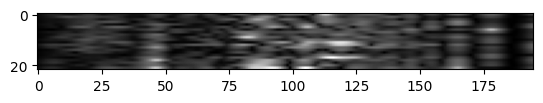

In [ ]:
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/modelLeNetcnn.h5')
# Define the class labels
class_labels = ['10', '7', '8','9']
import cv2
# Load input image with shape (224, 224, 3)
input_image1 = cv2.imread("/content/drive/MyDrive/splittedimg/test_set/7/trial_1810.png")
# Convert input image to grayscale
gray_image1 = cv2.cvtColor(input_image1, cv2.COLOR_BGR2GRAY)
# Reshape input image to (1, 28, 28, 1) to match expected input shape
image1 = gray_image1.reshape((1,195,22,1))
# Make the prediction
prediction_1 = model.predict(image1)
predicted_class1 = np.argmax(prediction_1)
# Print the predicted class label
print('Predicted class:', class_labels[predicted_class1])
print('10:tongue')
print('9:foot')
print('8:right')
print('7:right')
plt.figure('input_image1')
plt.imshow(gray_image1,cmap='gray')
plt.show()




In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

# Get predictions from the model
y_pred = model.predict(input_image1)
y_pred_classes = np.argmax(y_pred,axis=1)
y_true = np.argmax(input_image1,axis=1)

# Generate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Add labels to the plot
thresh = confusion_mtx.max() / 2.
for i, j in itertools.product(range(confusion_mtx.shape[0]), range(confusion_mtx.shape[1])):
    plt.text(j, i, format(confusion_mtx[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_mtx[i, j] > thresh else "black")

plt.show()

InvalidArgumentError: ignored

In [ ]:
import numpy as np
a=np.array([[[1],[2]],[[3],[4]]])

In [ ]:
a.shape

(2, 2, 1)

In [ ]:
import numpy as np

a = np.random.randn(3, 3)
b = np.random.randn(3, 1)
c = a * b

print(c)

[[-0.02072212  0.05654107 -0.02751706]
 [ 0.00455616  0.02124745 -0.01986122]
 [-0.40383939  0.12314419  0.22712768]]


In [ ]:
import numpy as np
x=np.array([[[1],[2]],[[3],[4]]])

In [ ]:
x.shape

(2, 2, 1)